In [1]:
# importing Required Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

#Suppresing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Ingestion
data = pd.read_csv("credit_card.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
#Checking the shape of data
data.shape

(30000, 25)

In [4]:
# Checking the dtype of Columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
# Checking for Null Values
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
# Checking for duplicated Values
data.duplicated().sum()

0

In [7]:
# Renaming Columns for better understanding
new_col = {"PAY_0":"PAY_1","default.payment.next.month":"defaulter"}
data.rename(columns=new_col,inplace= True)

In [8]:
# Checking for unique values in each column
for i in data.columns:
    print(f"\n{i} : {data[i].unique()}")


ID : [    1     2     3 ... 29998 29999 30000]

LIMIT_BAL : [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]

SEX : [2 1]

EDUCATION : [2 1 3 5 4 6 0]

MARRIAGE : [1 2 3 0]

AGE : [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73

In [9]:
# Creating a list of Columns having similar names.
pay_col = ["PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
bill_amt_col = ["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]
pay_amt_col = ["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]

In [10]:
# Replacing 0 & -2 with -1 & 2 in the PAY_X Columns
data[pay_col] = data[pay_col].replace({-2: 2, 0: -1})
# replacing 6 with 5 in Edaucation column since both 5 & 6 represents unknown.
data["EDUCATION"].replace(6,5,inplace=True)
# replacing 0 with 3 in Married Column since there is no category mentioned for 0 so we replace it with 3 which represents others category.
data["MARRIAGE"].replace(0,3,inplace=True)



In [11]:
# Creating a list that contains all columns to be dropped.
drop_col = ["ID"]

**Finding Coorelation between Features & Target**

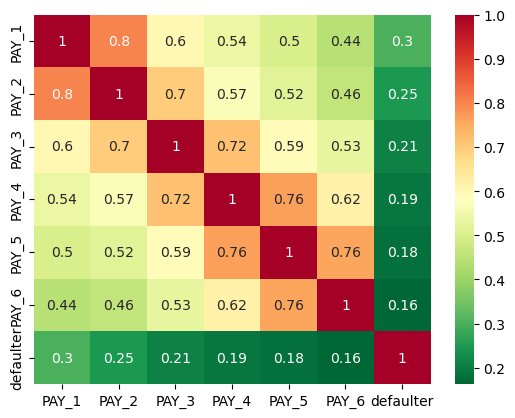

In [12]:
# Checking correlation of PAY_X columns vs TARGET column(defaulter)
pay = data[pay_col + ["defaulter"]]
pay_corr = pay.corr()
ax = sns.heatmap(pay_corr,
            xticklabels=pay_corr.columns,
            yticklabels=pay_corr.columns,
            annot = True,
            cmap ="RdYlGn_r")

Insight:

    From the above correlation heatmap we can conclude that the pay columns are positively correlated with defaulter column.

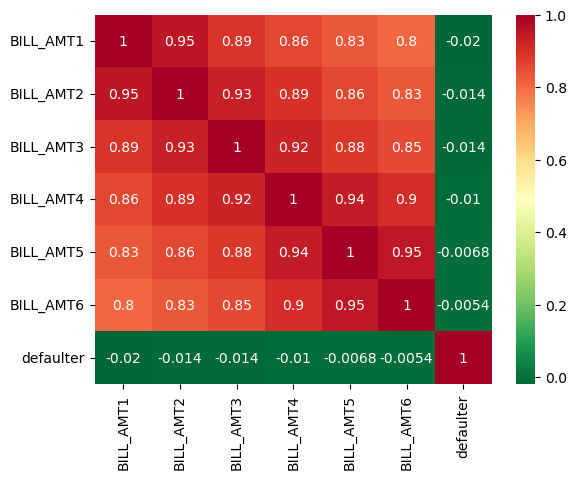

In [13]:
# Checking correlation of Bill_AMT columns vs TARGET column(defaulter)
bill = data[bill_amt_col + ["defaulter"]]
bill_corr = bill.corr()
ax = sns.heatmap(bill_corr,
            xticklabels=bill_corr.columns,
            yticklabels=bill_corr.columns,
            annot = True,
            cmap ="RdYlGn_r")

Insight:

    From the above Coorelation heatmap it is clear that Bill Amount is negatively correlated with defaulter Column. Also the coreelation value is very less hence we can drop these columns 

In [14]:
drop_col.extend(bill_amt_col)

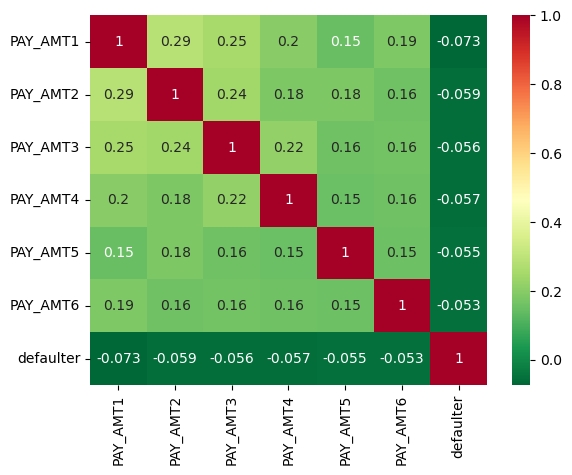

In [15]:
# Checking correlation of PAY_AMT columns vs TARGET column(defaulter)
pay_amt = data[pay_amt_col + ["defaulter"]]
pay_amt_corr = pay_amt.corr()
ax = sns.heatmap(pay_amt_corr,
            xticklabels=pay_amt_corr.columns,
            yticklabels=pay_amt_corr.columns,
            annot = True,
            cmap ="RdYlGn_r")

Insight:

    From the above Coorelation heatmap it is clear that Pay Amount is negatively correlated with defaulter Column. Also the coreelation value is very less hence we can drop these columns 

In [16]:
drop_col.extend(pay_amt_col)

In [17]:
data.drop(drop_col, axis = 1, inplace = True)

In [18]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,defaulter
0,20000.0,2,2,1,24,2,2,-1,-1,2,2,1
1,120000.0,2,2,2,26,-1,2,-1,-1,-1,2,1
2,90000.0,2,2,2,34,-1,-1,-1,-1,-1,-1,0
3,50000.0,2,2,1,37,-1,-1,-1,-1,-1,-1,0
4,50000.0,1,2,1,57,-1,-1,-1,-1,-1,-1,0


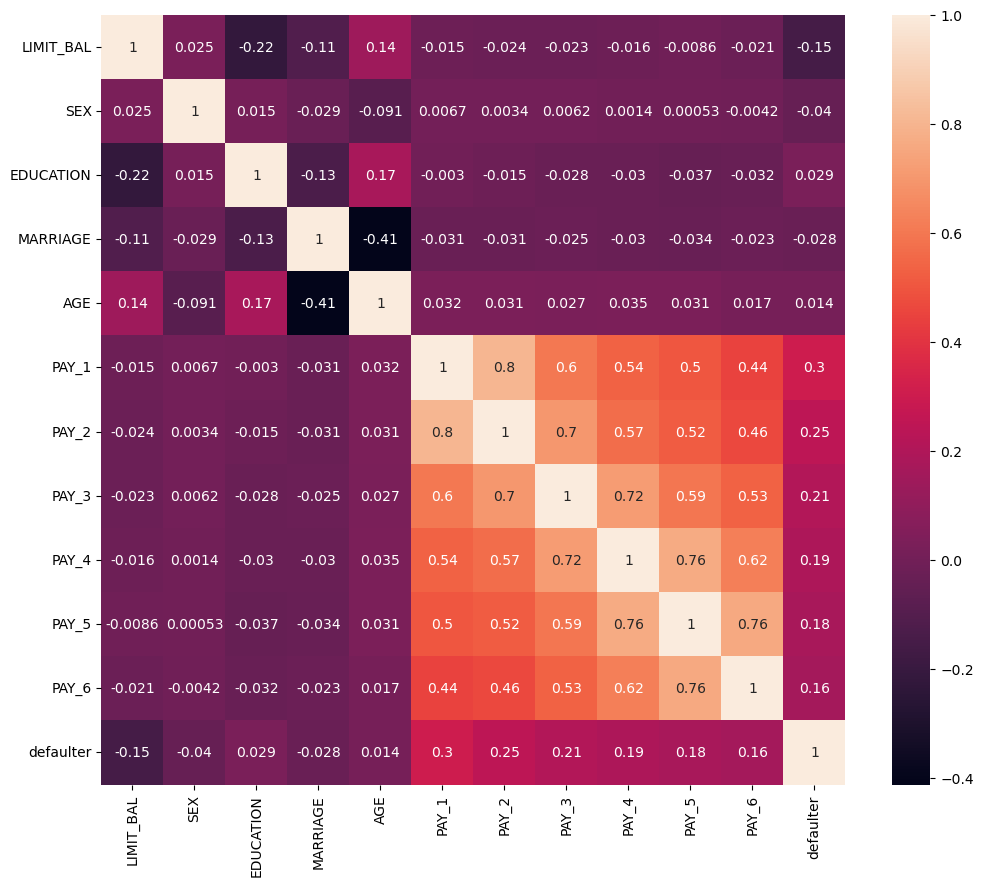

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot= True)
plt.show()

**Univariate Analysis**

In [20]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'defaulter'],
      dtype='object')

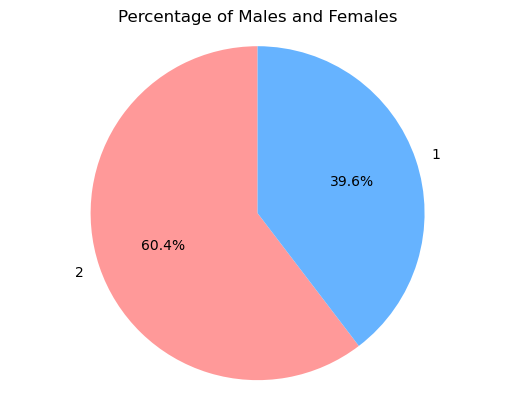

In [21]:
gender_counts = data['SEX'].value_counts()

# Create a pie chart
labels = [ '2','1']
sizes = gender_counts.values
colors = ['#ff9999','#66b3ff']  # Define colors for slices

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Percentage of Males and Females')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

**SEX: Gender (1=male, 2=female)**

Insight:

    In the given dataset around 60% of Clients are female whereas 40% clients are male.

In [22]:
# Calculate the number of defaulters and on-time payments
defaulters_count = data['defaulter'].value_counts()[1]
on_time_count = data['defaulter'].value_counts()[0]

print("Number of defaulters:", defaulters_count)
print("Number of on-time payments:", on_time_count)

Number of defaulters: 6636
Number of on-time payments: 23364


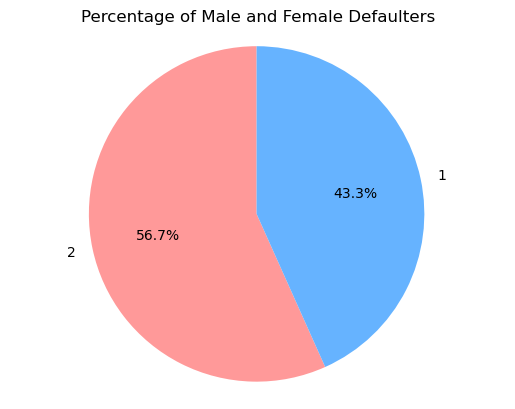

In [23]:
# Filter the data for defaulters
defaulters = data[data['defaulter'] == 1]

# Calculate the counts of male and female defaulters
gender_counts = defaulters['SEX'].value_counts()

# Create a pie chart
labels = ['2','1']
sizes = gender_counts.values
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Percentage of Male and Female Defaulters')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

**SEX: Gender (1=male, 2=female)**

Insight:

    From the given dataset a total of 6636 Clients were defaulters. The above pie chart shows that around 57% of defaulters are Females while 43% of defaulters are Male.

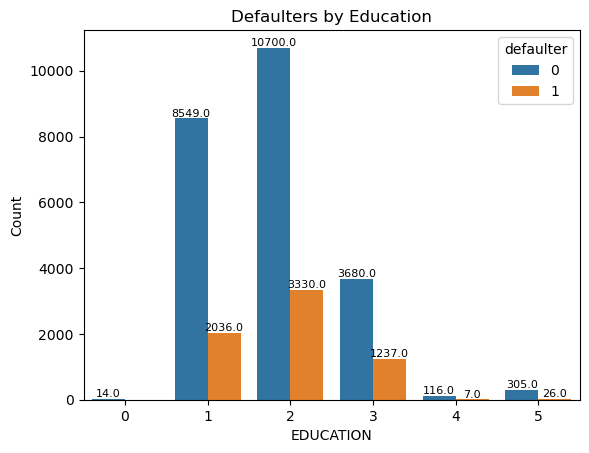

In [24]:
columns = ['EDUCATION', 'defaulter']
# Create a countplot
ax = sns.countplot(x='EDUCATION', hue='defaulter', data=data)
# Set labels and title
plt.xlabel('EDUCATION')
plt.ylabel('Count')
plt.title('Defaulters by Education')
# Add data labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)
# Display the plot
plt.show()

**EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown)**

Insight:

    From graph it is clear that clients defaults more those having University degrees followed by Graduate School & High school. 

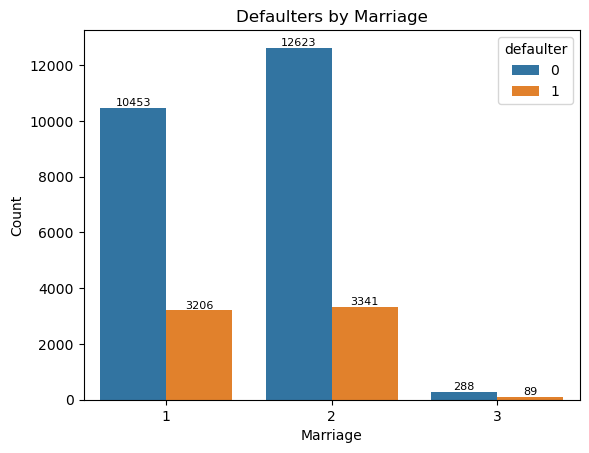

In [25]:
columns = ['MARRIAGE', 'defaulter']
# Create a countplot
ax = sns.countplot(x='MARRIAGE', hue='defaulter', data=data)
# Set labels and title
plt.xlabel('Marriage')
plt.ylabel('Count')
plt.title('Defaulters by Marriage')
# Add data labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)
# Display the plot
plt.show()

**MARRIAGE: Marital status (1=married, 2=single, 3=others)**

Insight:

      Single clients defaults more as compared to Married Clients & Others

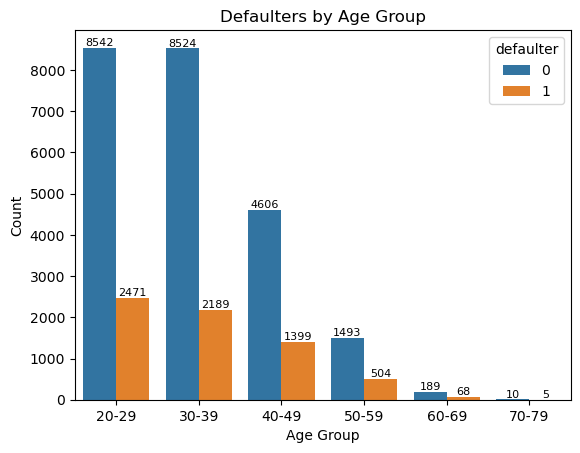

In [26]:
age_groups = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69',"70-79"]

# Categorize the ages into groups
data['AgeGroup'] = pd.cut(data['AGE'], bins=age_groups, labels=age_labels)

# Create a countplot
ax = sns.countplot(x='AgeGroup', hue='defaulter', data=data)

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Defaulters by Age Group')

# Add data labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)

# Display the plot
plt.show()

Insight:

    Younger Clients Defaults more.

    The defaulter count decreases with increase in Clients age.

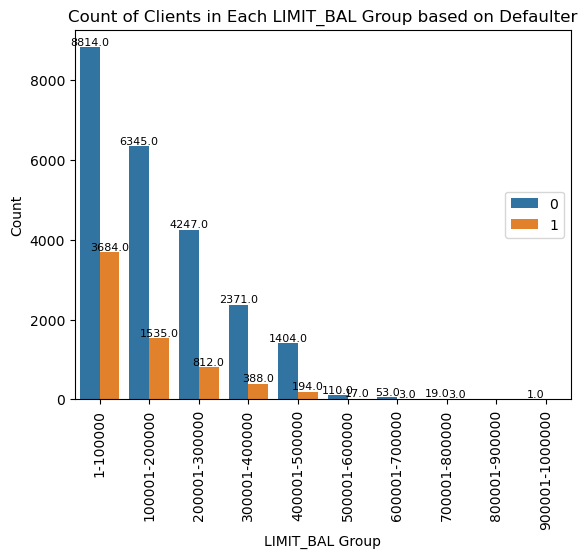

In [27]:
range_start = 1
range_end = 1000000
group_range = 100000
labels = [f"{i}-{i+group_range-1}" for i in range(range_start, range_end, group_range)]

# Convert the 'LIMIT_BAL' column into groups
data['LIMIT_BAL_Group'] = pd.cut(data['LIMIT_BAL'], bins=range(range_start, range_end + group_range, group_range), labels=labels)

limit_bal_group_col = 'LIMIT_BAL_Group'
defaulter_col = 'defaulter'

# Create the countplot
ax = sns.countplot(x=limit_bal_group_col, hue=defaulter_col, data=data)

# Set labels and title
plt.xlabel('LIMIT_BAL Group')
plt.ylabel('Count')
plt.title('Count of Clients in Each LIMIT_BAL Group based on Defaulter')
plt.xticks(rotation = 90)

# Add data labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)
plt.legend(loc='right')
# Display the plot
plt.show()

Insight:

    With increase in Limit Balance the count of defaulters decreases. 

SEX vs. defaulter: p-value = 4.944678999412044e-12
EDUCATION vs. defaulter: p-value = 5.8539464261404635e-33
MARRIAGE vs. defaulter: p-value = 7.790720364202813e-07


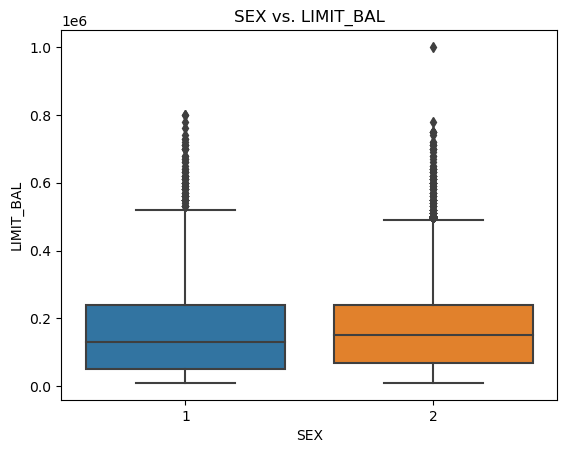

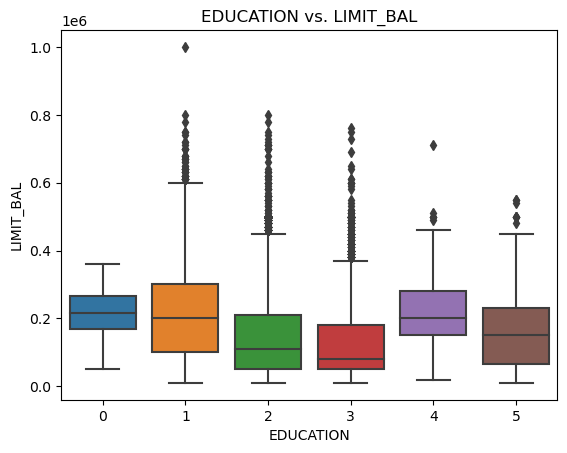

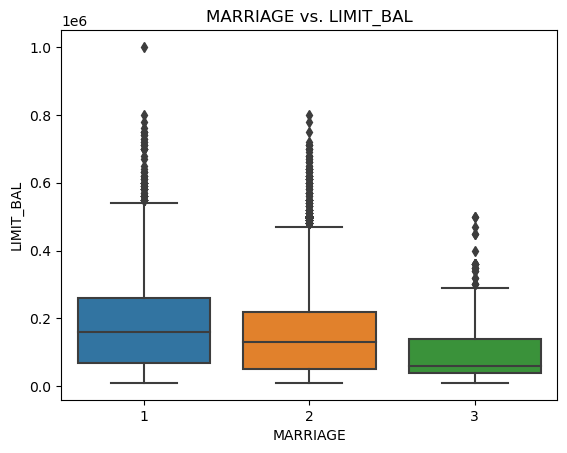

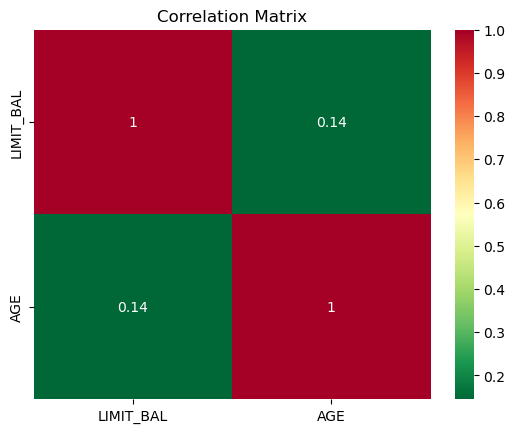

EDUCATION vs. defaulter: p-value = 5.8539464261404635e-33
LIMIT_BAL vs. defaulter: p-value = 1.3022439532597397e-157


In [28]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
target = 'defaulter'

# Bivariate analysis: Categorical vs. Categorical
for feature in ['SEX', 'EDUCATION', 'MARRIAGE']:
    contingency_table = pd.crosstab(data[feature], data[target])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f'{feature} vs. {target}: p-value = {p_value}')

# Bivariate analysis: Categorical vs. Numerical
for feature in ['SEX', 'EDUCATION', 'MARRIAGE']:
    plt.figure()
    sns.boxplot(x=feature, y='LIMIT_BAL', data=data)
    plt.title(f'{feature} vs. LIMIT_BAL')
    plt.show()

# Bivariate analysis: Numerical vs. Numerical
numerical_features = ['LIMIT_BAL', 'AGE']
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn_r')
plt.title('Correlation Matrix')
plt.show()

# Bivariate analysis: Categorical Target vs. Categorical Predictor
contingency_table = pd.crosstab(data['EDUCATION'], data[target])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f'EDUCATION vs. {target}: p-value = {p_value}')

# Bivariate analysis: Categorical Target vs. Numerical Predictor
defaulters = data[data[target] == 1]
non_defaulters = data[data[target] == 0]
t_stat, p_value = ttest_ind(defaulters['LIMIT_BAL'], non_defaulters['LIMIT_BAL'])
print(f'LIMIT_BAL vs. {target}: p-value = {p_value}')

In [29]:
z_scores = pd.DataFrame()
for feature in features:
    z_scores[feature] = (data[feature] - data[feature].mean()) / data[feature].std()
    
# Define the threshold for outlier detection (e.g., z-score > 3 or z-score < -3)
outlier_threshold = 3

# Identify outliers based on the z-scores
outliers = np.abs(z_scores) > outlier_threshold

# Print the count and percentage of outliers for each feature
for feature in features:
    num_outliers = outliers[feature].sum()
    percentage_outliers = (num_outliers / len(data)) * 100
    print(f'{feature}: {num_outliers} outliers ({percentage_outliers:.2f}%)')

LIMIT_BAL: 130 outliers (0.43%)
SEX: 0 outliers (0.00%)
EDUCATION: 331 outliers (1.10%)
MARRIAGE: 0 outliers (0.00%)
AGE: 141 outliers (0.47%)
PAY_1: 141 outliers (0.47%)
PAY_2: 58 outliers (0.19%)
PAY_3: 74 outliers (0.25%)
PAY_4: 169 outliers (0.56%)
PAY_5: 164 outliers (0.55%)
PAY_6: 129 outliers (0.43%)


In [30]:
z_scores

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,-1.136701,0.810147,0.189871,-1.068779,-1.245999,1.624792,1.541667,-0.608667,-0.583729,1.627368,1.575355
1,-0.365974,0.810147,0.189871,0.849116,-1.029030,-0.652883,1.541667,-0.608667,-0.583729,-0.566869,1.575355
2,-0.597192,0.810147,0.189871,0.849116,-0.161154,-0.652883,-0.605668,-0.608667,-0.583729,-0.566869,-0.591273
3,-0.905483,0.810147,0.189871,-1.068779,0.164300,-0.652883,-0.605668,-0.608667,-0.583729,-0.566869,-0.591273
4,-0.905483,-1.234302,0.189871,-1.068779,2.333990,-0.652883,-0.605668,-0.608667,-0.583729,-0.566869,-0.591273
...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404752,-1.234302,1.467886,-1.068779,0.381269,-0.652883,-0.605668,-0.608667,-0.583729,-0.566869,-0.591273
29996,-0.134756,-1.234302,1.467886,0.849116,0.815207,-0.652883,-0.605668,-0.608667,-0.583729,-0.566869,-0.591273
29997,-1.059629,-1.234302,0.189871,0.849116,0.164300,3.143241,2.257446,1.532013,-0.583729,-0.566869,-0.591273
29998,-0.674265,-1.234302,1.467886,-1.068779,0.598238,0.865567,-0.605668,-0.608667,-0.583729,-0.566869,-0.591273
